# Machine learning and Deep learning Models For GC Prediction with metabolomics dataset 

In [1]:
# initial and general libraries
import time
import xgboost 
import sklearn 
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import tree
from colorama import Fore, Back, Style
from matplotlib.ticker import MaxNLocator
from matplotlib import pyplot
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# machine learning libraries
import statsmodels as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Deep learning libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from matplotlib import rcParams

# preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import plot_tree
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# accuracy and metrics libraries
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# improve hyperparameters libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# fill null data libraries
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Balancing dataset
from sklearn.utils import resample

# Feature selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

sns.set()
%matplotlib inline


# call algorithms ( classifiers)
#  Random Forest Classifier
RfcModel = RandomForestClassifier()
# call Decision Tree Algorithm
DTModel = DecisionTreeClassifier()
# Call Logistic Regression model algorithm
LRModel = LogisticRegression()
# call support vector machine
svcModel = SVC()
# call Random forest Regressor
rfrModel = RandomForestRegressor()
# call GaussianNB
nbModel = GaussianNB()
# call QuadraticDiscriminantAnalysis
qdaModel = QuadraticDiscriminantAnalysis() 

# _________________________________________________________________________
# Read Data 

In [2]:
OrgData = pd.read_csv('CGMAIN.csv')

# Define x, y for classification

In [3]:
#define x, y 
np.random.seed(42)
x = OrgData.drop('state', axis = 1)
y = OrgData.state

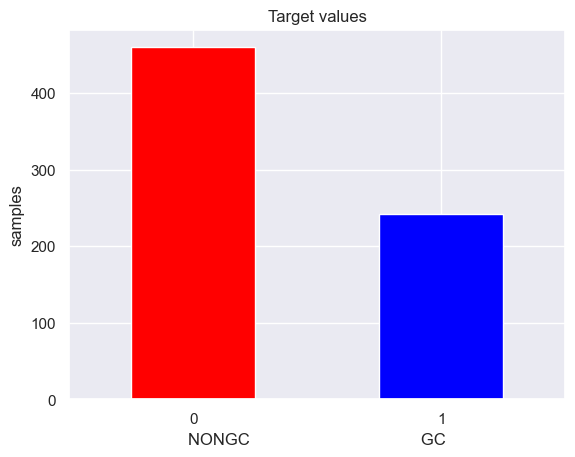

dataset have  702  Instances
dataset have  460  Negative Instances
dataset have  242   Positive Instances


In [4]:
OrgData.state.dropna().astype(int).value_counts().plot.bar(color = ['red', 'blue'] )
plt.xlabel('NONGC                                     GC')
plt.ylabel('samples')
plt.title('Target values')
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()
priData = OrgData

print( Back.WHITE +'dataset have ', Back.GREEN + str(len(OrgData)), Back.WHITE + ' Instances')
print( Back.RED +'dataset have ', Back.GREEN + str(OrgData.state.value_counts()[0]),
      Back.RED + ' Negative Instances')
print( Back.BLUE +'dataset have ', Back.GREEN + str(OrgData.state.value_counts()[1]),
      Back.BLUE + '  Positive Instances')

# Start Modeling

In [5]:
# use stratified method for split input and output into train and test parts: 
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                   y,
                                                   test_size = .2,
                                                   stratify = y, 
                                                   random_state = 42)

## --------------------------------------------------------------
### SVC ALG

Training Accuracy: 0.78

**SVC Classification Report**
              precision    recall  f1-score   support

    Negative       0.82      0.73      0.77        92
    Positive       0.58      0.69      0.63        49

    accuracy                           0.72       141
   macro avg       0.70      0.71      0.70       141
weighted avg       0.73      0.72      0.72       141


**Confusion Matrix:**
                 Predicted Negative  Predicted Positive
Actual Negative                  67                  25
Actual Positive                  15                  34




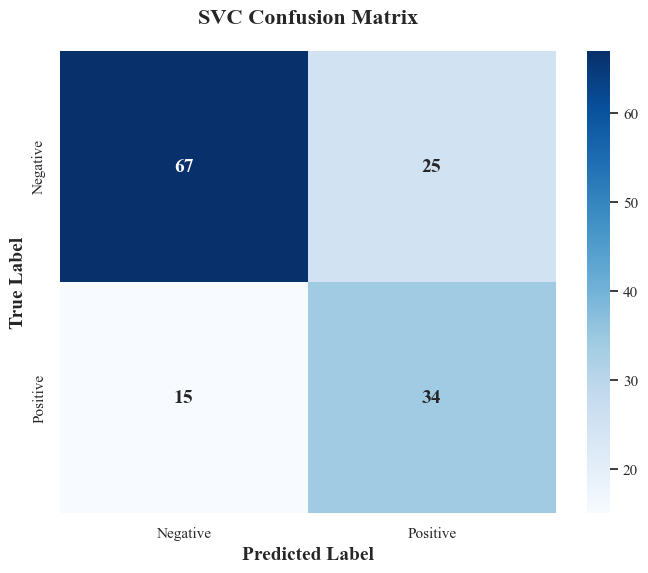

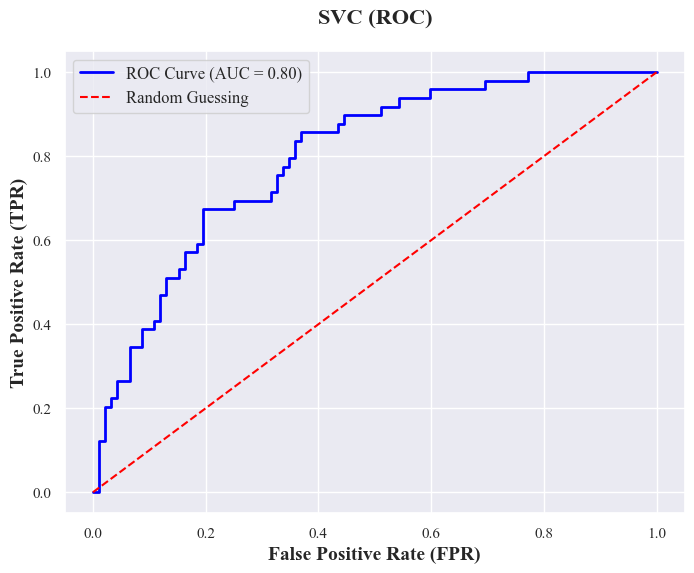

In [6]:
# Import required libraries
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set global font to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# Set random seed for reproducibility
np.random.seed(42)

# Initialize and train SVC model with probability estimation
svcModel = SVC(probability=True)  # Enable probability for ROC curve
svcModel.fit(x_train, y_train)

# Calculate training accuracy
train_accuracy = svcModel.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on test set
y_predictsvc = svcModel.predict(x_test)

# Print classification report
print('\n' + '='*50)
print('**SVC Classification Report**')
print('='*50)
print(classification_report(y_test, y_predictsvc, target_names=['Negative', 'Positive']))
print('='*50 + '\n')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_predictsvc)
conf_df = pd.DataFrame(conf_matrix, 
                      columns=['Predicted Negative', 'Predicted Positive'],
                      index=['Actual Negative', 'Actual Positive'])

print("**Confusion Matrix:**")
print(conf_df)
print('\n')

# Plot confusion matrix heatmap with blue colormap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix, 
                     annot=True, 
                     fmt='d', 
                     cmap='Blues',
                     xticklabels=['Negative', 'Positive'],
                     yticklabels=['Negative', 'Positive'],
                     annot_kws={'size': 14, 'weight': 'bold'})

plt.title('SVC Confusion Matrix', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.show()

# ROC Curve Analysis
# Get predicted probabilities for positive class
y_probs = svcModel.predict_proba(x_test)[:, 1]

# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')

# Formatting the plot
plt.xlabel('False Positive Rate (FPR)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=14, fontweight='bold')
plt.title('SVC (ROC)', 
          pad=20, fontsize=16, fontweight='bold')

plt.legend(prop={'size': 12})
plt.grid(True)
plt.show()

# ----------------------------------------------
# CNN

              precision    recall  f1-score   support

           0     0.7706    0.9130    0.8358        92
           1     0.7500    0.4898    0.5926        49

    accuracy                         0.7660       141
   macro avg     0.7603    0.7014    0.7142       141
weighted avg     0.7635    0.7660    0.7513       141



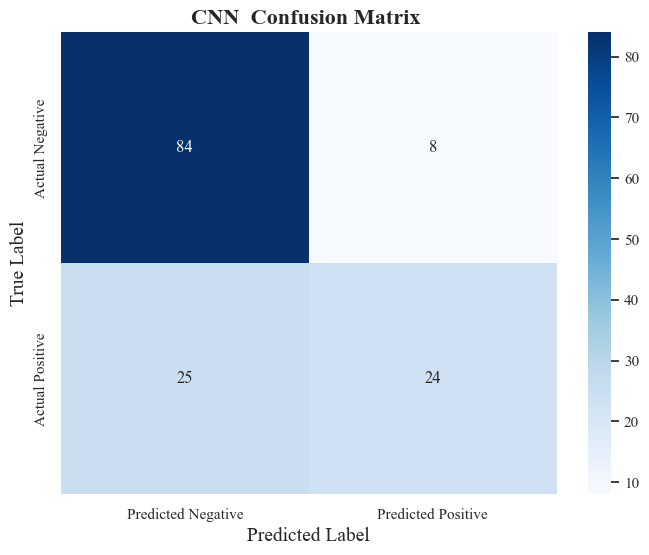

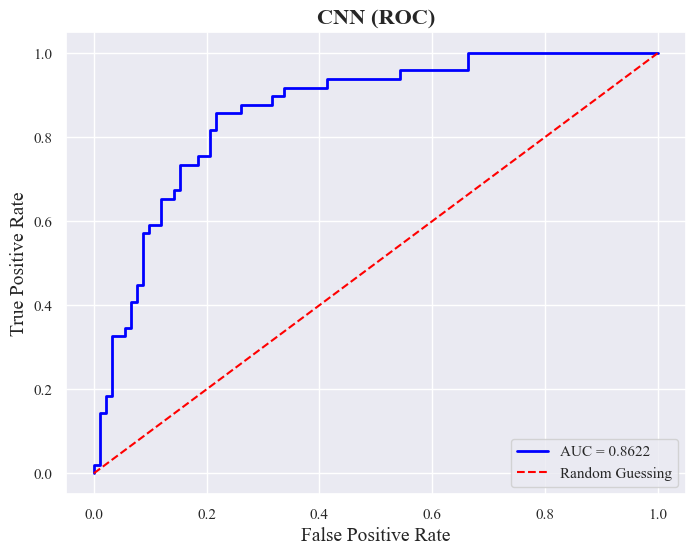

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from matplotlib import rcParams

# Set font for charts
rcParams['font.family'] = 'Times New Roman'

# Set seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Load data
df = pd.read_csv('CGMAIN.csv')

# Prepare data
X = df.drop(columns="state").values  # Features
y = df["state"].values  # Target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features

# Reshape data for CNN (samples, channels, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=seed, stratify=y
)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create datasets and data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# CNN Model definition
class CNNClassifier(nn.Module):
    def __init__(self, input_len, num_classes):
        super(CNNClassifier, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        # Second convolutional layer
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        # Adaptive pooling layer
        self.pool = nn.AdaptiveAvgPool1d(1)
        # Fully connected layer
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Apply ReLU activation
        x = F.relu(self.conv2(x))  # Apply ReLU activation
        x = self.pool(x).squeeze(-1)  # Global average pooling
        x = self.fc(x)  # Final classification layer
        return x

# Initialize model
num_classes = len(np.unique(y))
model = CNNClassifier(X_scaled.shape[2], num_classes)
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Optimizer

# Training loop
for epoch in range(20):
    model.train()  # Set model to training mode
    for xb, yb in train_loader:
        optimizer.zero_grad()  # Clear gradients
        out = model(xb)  # Forward pass
        loss = criterion(out, yb)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

# Evaluation
model.eval()  # Set model to evaluation mode
all_preds, all_probs, all_labels = [], [], []
with torch.no_grad():  # Disable gradient calculation
    for xb, yb in test_loader:
        out = model(xb)
        probs = F.softmax(out, dim=1)  # Get class probabilities
        preds = torch.argmax(probs, dim=1)  # Get predicted classes
        all_preds.extend(preds.numpy())  # Store predictions
        all_probs.extend(probs[:, 1].numpy())  # Store positive class probabilities
        all_labels.extend(yb.numpy())  # Store true labels

# Classification report
report = classification_report(all_labels, all_preds, digits=4)
print(report)

# Confusion matrix heatmap
matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('CNN  Confusion Matrix ', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('CNN (ROC)', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## --------------------------------------------------------------
### RF ALG

Random Forest Hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Training Accuracy: 1.0000

Test Accuracy: 0.8369

**Random Forest Classifier Results**
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.87        92
    Positive       0.76      0.78      0.77        49

    accuracy                           0.84       141
   macro avg       0.82      0.82      0.82       141
weighted avg       0.84      0.84      0.84       141


**Confusion Matrix:**
                 Predicted Negative  Predicted Positive
Actual Negative                  80                  12
Ac

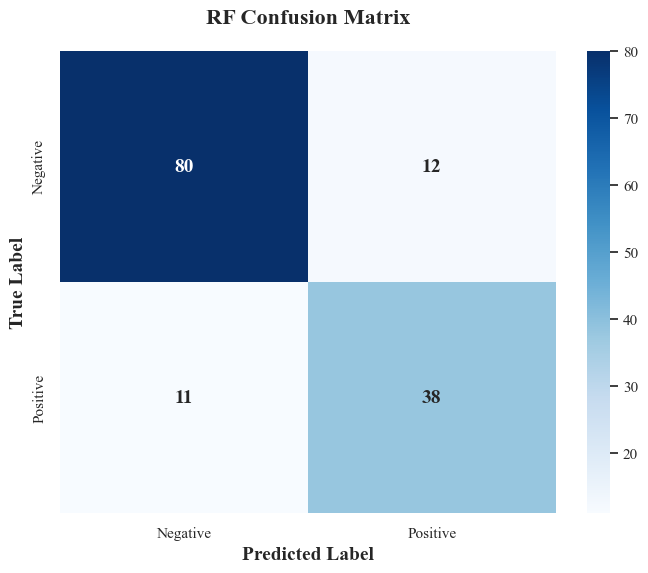

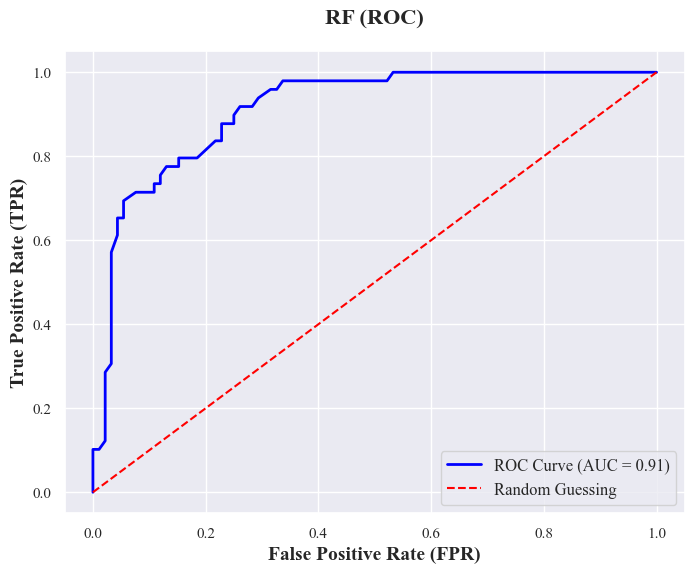

In [8]:
# Set global font to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# Initialize Random Forest Classifier
np.random.seed(42)
RfcModel = RandomForestClassifier()

# Display hyperparameters
print("Random Forest Hyperparameters:")
print(RfcModel.get_params())
print('\n' + '='*50 + '\n')

# Train the model
RfcModel.fit(x_train, y_train)

# Calculate training accuracy
train_accuracy = RfcModel.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Make predictions
y_predictrfc = RfcModel.predict(x_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_predictrfc)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Classification report
print('\n' + '='*50)
print('**Random Forest Classifier Results**')
print('='*50)
print(classification_report(y_test, y_predictrfc, target_names=['Negative', 'Positive']))
print('='*50 + '\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predictrfc)
conf_df = pd.DataFrame(conf_matrix,
                      columns=['Predicted Negative', 'Predicted Positive'],
                      index=['Actual Negative', 'Actual Positive'])

print("**Confusion Matrix:**")
print(conf_df)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            annot_kws={'size': 14, 'weight': 'bold'})

plt.title('RF Confusion Matrix', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.show()

# ROC Curve Analysis
y_probs = RfcModel.predict_proba(x_test)[:, 1]  # Positive class probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')

# Formatting
plt.xlabel('False Positive Rate (FPR)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=14, fontweight='bold')
plt.title('RF (ROC)', pad=20, fontsize=16, fontweight='bold')
plt.legend(prop={'size': 12})
plt.grid(True)
plt.show()

### -----------------------------------------------------------------------
# RNN

              precision    recall  f1-score   support

           0     0.9111    0.8913    0.9011        92
           1     0.8039    0.8367    0.8200        49

    accuracy                         0.8723       141
   macro avg     0.8575    0.8640    0.8605       141
weighted avg     0.8739    0.8723    0.8729       141



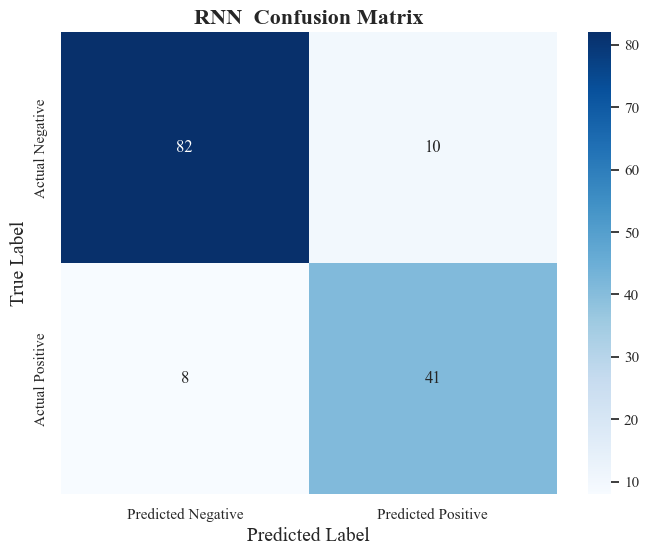

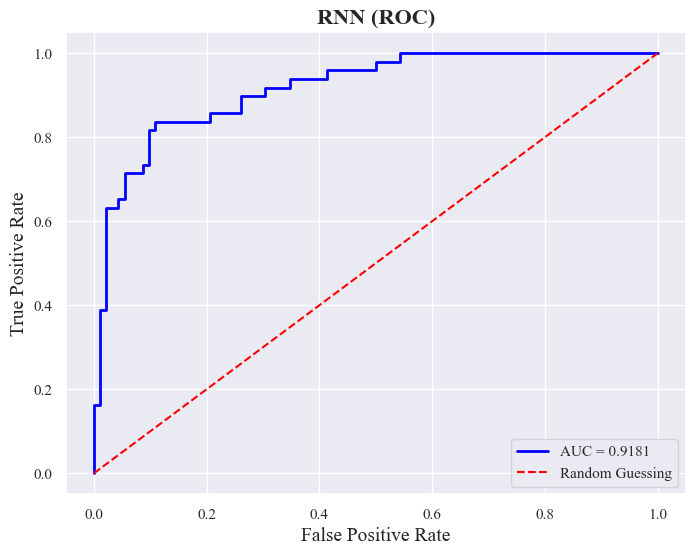

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Set font for all plots to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# Set random seeds for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Load dataset
df = pd.read_csv('CGMAIN.csv')  # Update file path if needed
X = df.drop(columns='state').values  # Features
y = df['state'].values  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for RNN (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=seed, stratify=y
)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create datasets and data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# RNN Model definition
class RNNClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RNNClassifier, self).__init__()
        # RNN layer with ReLU activation
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True, nonlinearity='relu')
        # Fully connected output layer
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # RNN forward pass
        out, _ = self.rnn(x)
        # Get last timestep output
        out = self.fc(out[:, -1, :])
        return out

# Initialize model parameters
input_size = X.shape[1]  # Number of features
hidden_size = 64  # RNN hidden units
num_classes = len(np.unique(y))  # Number of classes

# Create model instance
model = RNNClassifier(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Optimizer

# Training loop
for epoch in range(20):
    model.train()  # Set model to training mode
    for xb, yb in train_loader:
        optimizer.zero_grad()  # Clear gradients
        out = model(xb)  # Forward pass
        loss = criterion(out, yb)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

# Model evaluation
model.eval()  # Set model to evaluation mode
all_preds, all_probs, all_labels = [], [], []
with torch.no_grad():  # Disable gradient calculation
    for xb, yb in test_loader:
        out = model(xb)
        probs = F.softmax(out, dim=1)  # Get class probabilities
        preds = torch.argmax(probs, dim=1)  # Get predictions
        all_preds.extend(preds.numpy())
        all_probs.extend(probs[:, 1].numpy())  # Positive class probabilities
        all_labels.extend(yb.numpy())

# Print classification report
report = classification_report(all_labels, all_preds, digits=4)
print(report)

# Confusion matrix heatmap
matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('RNN  Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('RNN (ROC)', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## --------------------------------------------------------------
### DT ALG

Decision Tree Hyperparameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


Training Accuracy: 1.0000

Test Accuracy: 0.7730

**Decision Tree Classifier Results**
              precision    recall  f1-score   support

    Negative       0.82      0.84      0.83        92
    Positive       0.68      0.65      0.67        49

    accuracy                           0.77       141
   macro avg       0.75      0.75      0.75       141
weighted avg       0.77      0.77      0.77       141


**Confusion Matrix:**
                 Predicted Negative  Predicted Positive
Actual Negative                  77                  15
Actual Positive                  17                  32


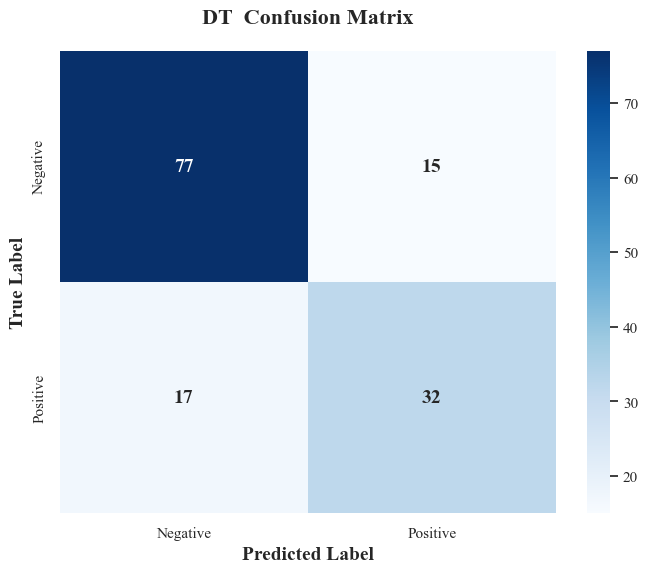

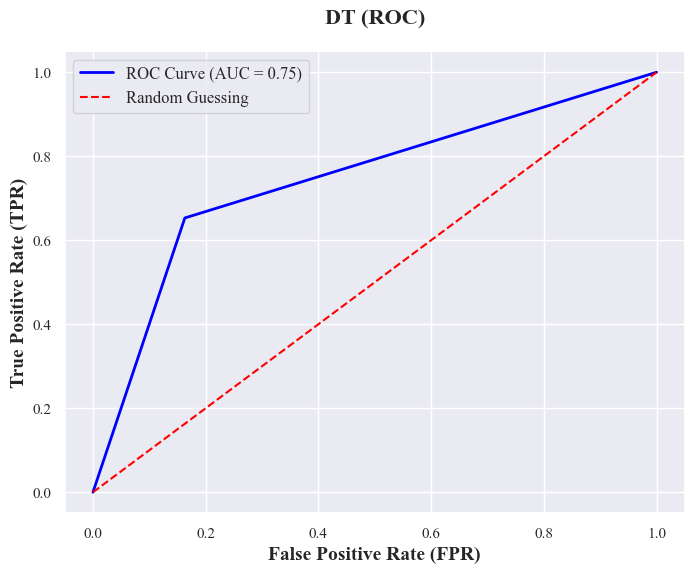

In [10]:
# Set global font to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# Initialize Decision Tree Classifier
np.random.seed(42)
DTModel = DecisionTreeClassifier()

# Display hyperparameters
print("Decision Tree Hyperparameters:")
print(DTModel.get_params())
print('\n' + '='*50 + '\n')

# Train the model
DTModel.fit(x_train, y_train)

# Calculate training accuracy
train_accuracy = DTModel.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Make predictions
y_predictdt = DTModel.predict(x_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_predictdt)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Classification report
print('\n' + '='*50)
print('**Decision Tree Classifier Results**')
print('='*50)
print(classification_report(y_test, y_predictdt, target_names=['Negative', 'Positive']))
print('='*50 + '\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predictdt)
conf_df = pd.DataFrame(conf_matrix,
                      columns=['Predicted Negative', 'Predicted Positive'],
                      index=['Actual Negative', 'Actual Positive'])

print("**Confusion Matrix:**")
print(conf_df)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            annot_kws={'size': 14, 'weight': 'bold'})

plt.title('DT  Confusion Matrix', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.show()

# ROC Curve Analysis
y_probs = DTModel.predict_proba(x_test)[:, 1]  # Positive class probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')

# Formatting
plt.xlabel('False Positive Rate (FPR)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=14, fontweight='bold')
plt.title('DT (ROC)', pad=20, fontsize=16, fontweight='bold')
plt.legend(prop={'size': 12})
plt.grid(True)
plt.show()

### ---------------------------------------------
# LSTM

              precision    recall  f1-score   support

           0     0.9022    0.9022    0.9022        92
           1     0.8163    0.8163    0.8163        49

    accuracy                         0.8723       141
   macro avg     0.8593    0.8593    0.8593       141
weighted avg     0.8723    0.8723    0.8723       141



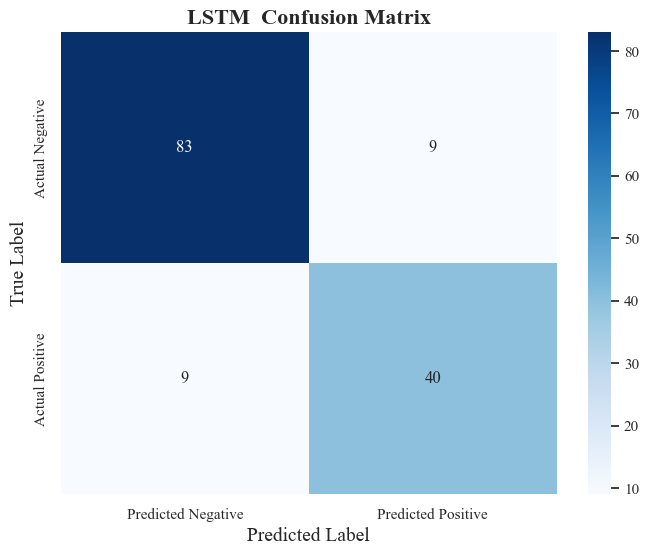

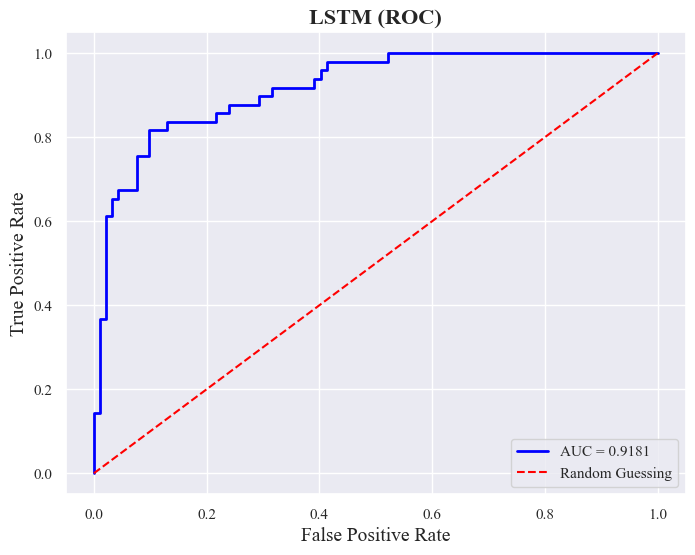

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Set font to Times New Roman for all plots
rcParams['font.family'] = 'Times New Roman'

# Set random seeds for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Load dataset
df = pd.read_csv('CGMAIN.csv')  # Update file path if needed
X = df.drop(columns='state').values  # Features
y = df['state'].values  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=seed, stratify=y
)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create datasets and data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# LSTM Model definition
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMClassifier, self).__init__()
        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        # Fully connected output layer
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # LSTM forward pass
        _, (hn, _) = self.lstm(x)
        # Get last hidden state and pass through FC layer
        out = self.fc(hn[-1])
        return out

# Initialize model parameters
num_classes = len(np.unique(y))  # Number of classes
input_size = X_scaled.shape[2]  # Number of features
model = LSTMClassifier(input_size=input_size, hidden_size=64, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Optimizer

# Training loop
for epoch in range(20):
    model.train()  # Set model to training mode
    for xb, yb in train_loader:
        optimizer.zero_grad()  # Clear gradients
        out = model(xb)  # Forward pass
        loss = criterion(out, yb)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

# Model evaluation
model.eval()  # Set model to evaluation mode
all_preds, all_probs, all_labels = [], [], []
with torch.no_grad():  # Disable gradient calculation
    for xb, yb in test_loader:
        out = model(xb)
        probs = F.softmax(out, dim=1)  # Get class probabilities
        preds = torch.argmax(probs, dim=1)  # Get predictions
        all_preds.extend(preds.numpy())
        all_probs.extend(probs[:, 1].numpy())  # Positive class probabilities for ROC
        all_labels.extend(yb.numpy())

# Print classification report
report = classification_report(all_labels, all_preds, digits=4)
print(report)

# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(all_labels, all_preds), 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('LSTM  Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('LSTM (ROC)', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## --------------------------------------------------------------
### LR

Logistic Regression Hyperparameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Training Accuracy: 0.6560

Test Accuracy: 0.6525

**Logistic Regression Results**
              precision    recall  f1-score   support

    Negative       0.65      1.00      0.79        92
    Positive       0.00      0.00      0.00        49

    accuracy                           0.65       141
   macro avg       0.33      0.50      0.39       141
weighted avg       0.43      0.65      0.52       141


**Confusion Matrix:**
                 Predicted Negative  Predicted Positive
Actual Negative                  92                   0
Actual Positive                  49                   0


C:\Users\Arman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Arman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Arman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

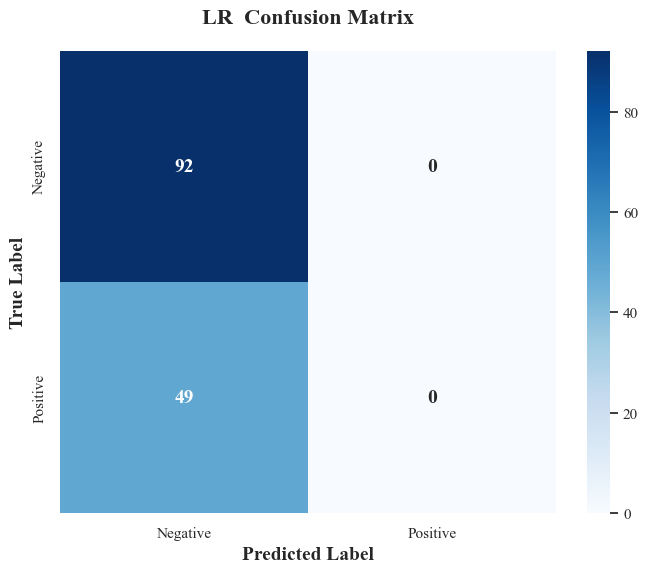

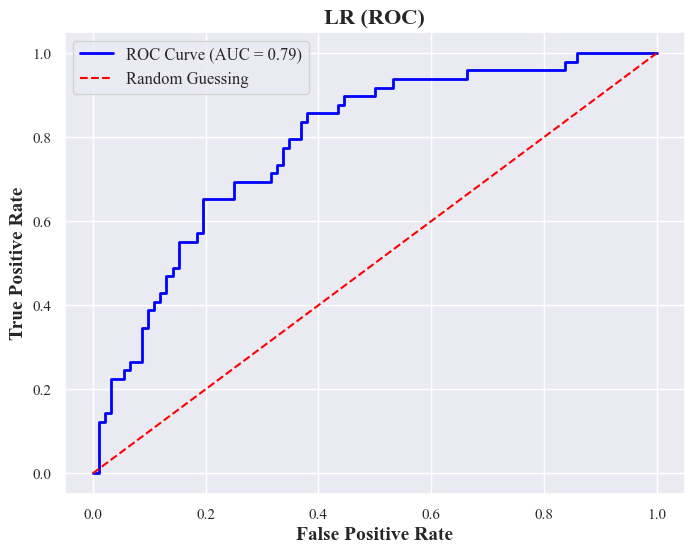

In [12]:

# Set global font to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# Initialize Logistic Regression Model
np.random.seed(42)
LRModel = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Display hyperparameters
print("Logistic Regression Hyperparameters:")
print(LRModel.get_params())
print('\n' + '='*50 + '\n')

# Train the model
LRModel.fit(x_train, y_train)

# Calculate training accuracy
train_accuracy = LRModel.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Make predictions
y_predictlr = LRModel.predict(x_test)
y_probs = LRModel.predict_proba(x_test)[:, 1]  # Probabilities for ROC curve

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_predictlr)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Classification report
print('\n' + '='*50)
print('**Logistic Regression Results**')
print('='*50)
print(classification_report(y_test, y_predictlr, target_names=['Negative', 'Positive']))
print('='*50 + '\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predictlr)
conf_df = pd.DataFrame(conf_matrix,
                      columns=['Predicted Negative', 'Predicted Positive'],
                      index=['Actual Negative', 'Actual Positive'])

print("**Confusion Matrix:**")
print(conf_df)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            annot_kws={'size': 14, 'weight': 'bold'})

plt.title('LR  Confusion Matrix', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('LR (ROC)', fontsize=16, fontweight='bold')
plt.legend(prop={'size': 12})
plt.grid(True)
plt.show()


## --------------------------------------------------------------
### NB

Naive Bayes Hyperparameters:
{'priors': None, 'var_smoothing': 1e-09}


Training Accuracy: 0.8039

Test Accuracy: 0.7660

**Naive Bayes Classifier Results**
              precision    recall  f1-score   support

    Negative       0.89      0.73      0.80        92
    Positive       0.62      0.84      0.71        49

    accuracy                           0.77       141
   macro avg       0.76      0.78      0.76       141
weighted avg       0.80      0.77      0.77       141


**Confusion Matrix:**
                 Predicted Negative  Predicted Positive
Actual Negative                  67                  25
Actual Positive                   8                  41


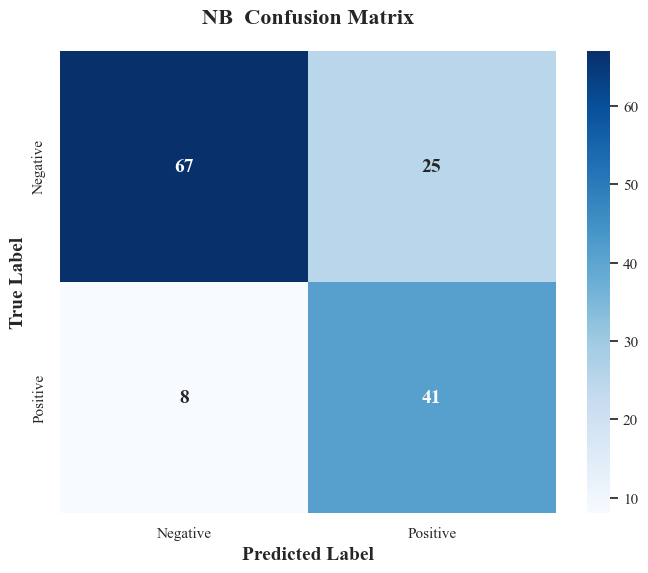

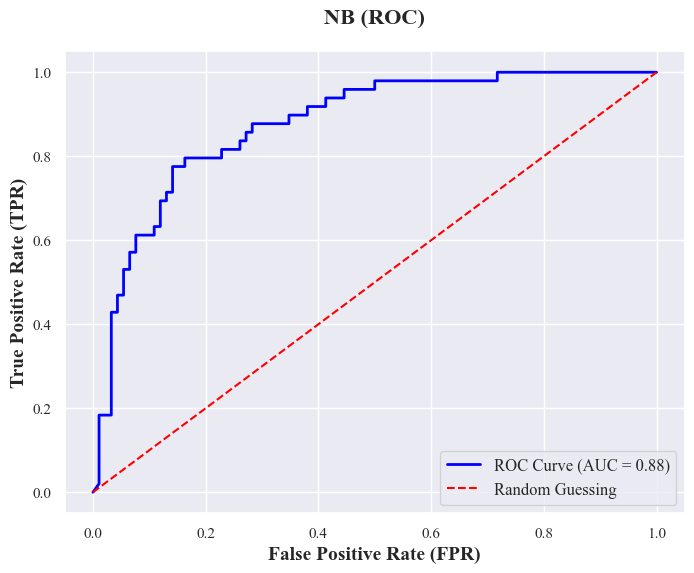

In [13]:

# Set global font to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# Initialize Naive Bayes Model
np.random.seed(42)
nbModel = GaussianNB()

# Display hyperparameters
print("Naive Bayes Hyperparameters:")
print(nbModel.get_params())
print('\n' + '='*50 + '\n')

# Train the model
nbModel.fit(x_train, y_train)

# Calculate training accuracy
train_accuracy = nbModel.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Make predictions
y_predictNB = nbModel.predict(x_test)
y_probs = nbModel.predict_proba(x_test)[:, 1]  # Probabilities for positive class

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_predictNB)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Classification report
print('\n' + '='*50)
print('**Naive Bayes Classifier Results**')
print('='*50)
print(classification_report(y_test, y_predictNB, target_names=['Negative', 'Positive']))
print('='*50 + '\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predictNB)
conf_df = pd.DataFrame(conf_matrix,
                      columns=['Predicted Negative', 'Predicted Positive'],
                      index=['Actual Negative', 'Actual Positive'])

print("**Confusion Matrix:**")
print(conf_df)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            annot_kws={'size': 14, 'weight': 'bold'})

plt.title('NB  Confusion Matrix', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.show()

# ROC Curve Analysis
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=14, fontweight='bold')
plt.title('NB (ROC)', pad=20, fontsize=16, fontweight='bold')
plt.legend(prop={'size': 12})
plt.grid(True)
plt.show()


### ---------------------------------------------
# MLP

Classification Report:
              precision    recall  f1-score   support

           0     0.9011    0.8913    0.8962        92
           1     0.8000    0.8163    0.8081        49

    accuracy                         0.8652       141
   macro avg     0.8505    0.8538    0.8521       141
weighted avg     0.8660    0.8652    0.8656       141



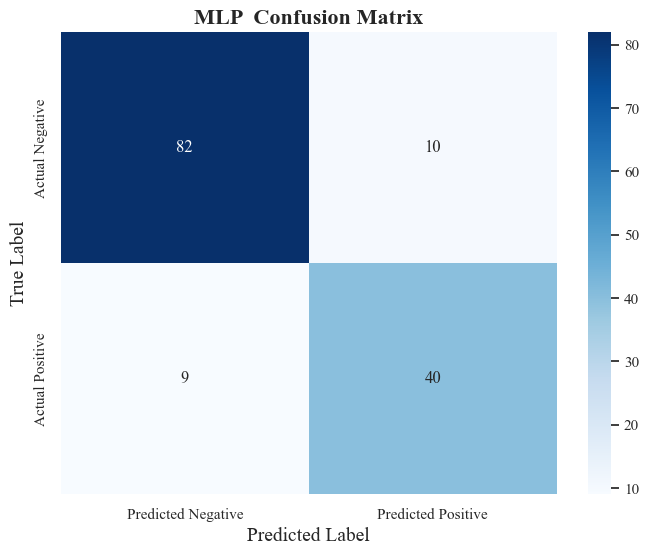

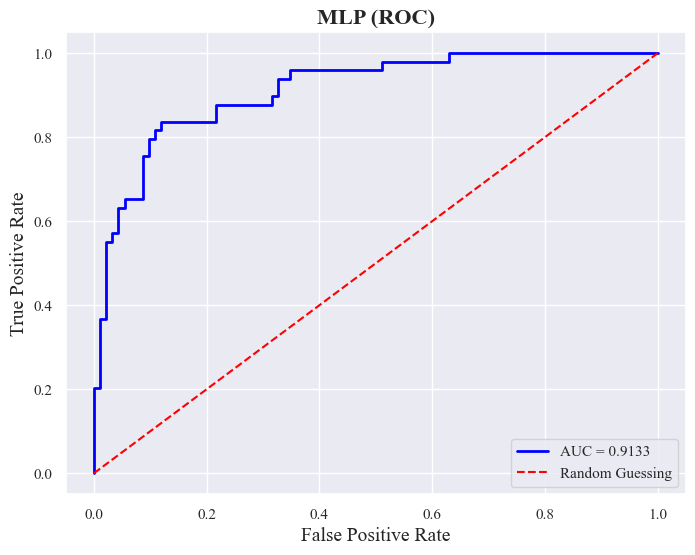

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['font.family'] = 'Times New Roman'

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

df = pd.read_csv('CGMAIN.csv')  
X = df.drop(columns='state').values
y = df['state'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=seed, stratify=y
)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

num_classes = len(np.unique(y))
input_dim = X.shape[1]
model = MLPClassifier(input_dim=input_dim, hidden_dim=64, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(20):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()

model.eval()
all_preds, all_probs, all_labels = [], [], []
with torch.no_grad():
    for xb, yb in test_loader:
        out = model(xb)
        probs = F.softmax(out, dim=1)
        preds = torch.argmax(probs, dim=1)
        all_preds.extend(preds.numpy())
        all_probs.extend(probs[:, 1].numpy())  
        all_labels.extend(yb.numpy())

report = classification_report(all_labels, all_preds, digits=4)
print("Classification Report:")
print(report)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(all_labels, all_preds), 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('MLP  Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('MLP (ROC)', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## --------------------------------------------------------------
### Quadratic Discriminant Analysis (QDA)

QDA Hyperparameters:
{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}


Training Accuracy: 0.8360

Test Accuracy: 0.8156

**Quadratic Discriminant Analysis Results**
              precision    recall  f1-score   support

    Negative       0.90      0.80      0.85        92
    Positive       0.69      0.84      0.76        49

    accuracy                           0.82       141
   macro avg       0.80      0.82      0.80       141
weighted avg       0.83      0.82      0.82       141


**Confusion Matrix:**
                 Predicted Negative  Predicted Positive
Actual Negative                  74                  18
Actual Positive                   8                  41


C:\Users\Arman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\Arman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


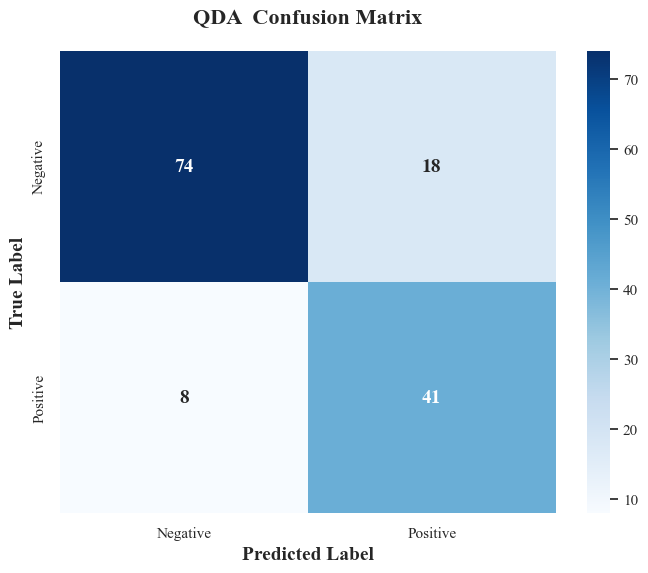

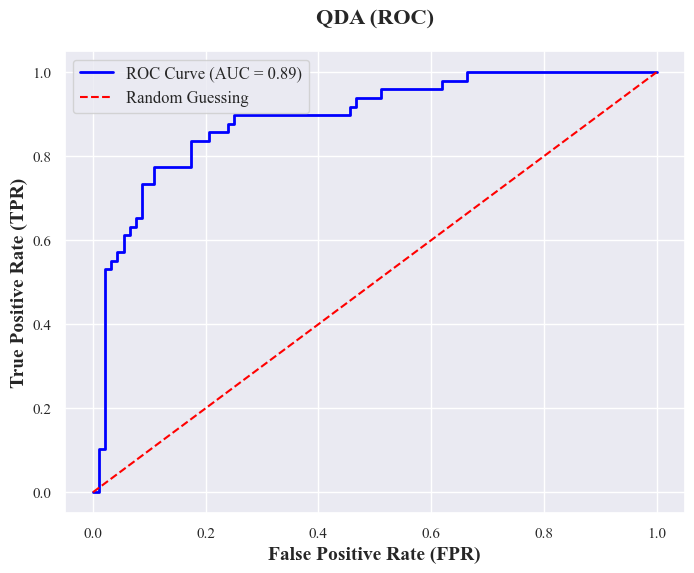

In [15]:
# Set global font to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# Initialize QDA Model
np.random.seed(42)
qdaModel = QuadraticDiscriminantAnalysis()

# Display hyperparameters
print("QDA Hyperparameters:")
print(qdaModel.get_params())
print('\n' + '='*50 + '\n')

# Train the model
qdaModel.fit(x_train, y_train)

# Calculate training accuracy
train_accuracy = qdaModel.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Make predictions
y_predictQDA = qdaModel.predict(x_test)
y_probs = qdaModel.predict_proba(x_test)[:, 1]  # Probabilities for positive class

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_predictQDA)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Classification report
print('\n' + '='*50)
print('**Quadratic Discriminant Analysis Results**')
print('='*50)
print(classification_report(y_test, y_predictQDA, target_names=['Negative', 'Positive']))
print('='*50 + '\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predictQDA)
conf_df = pd.DataFrame(conf_matrix,
                      columns=['Predicted Negative', 'Predicted Positive'],
                      index=['Actual Negative', 'Actual Positive'])

print("**Confusion Matrix:**")
print(conf_df)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            annot_kws={'size': 14, 'weight': 'bold'})

plt.title('QDA  Confusion Matrix', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.show()

# ROC Curve Analysis
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=14, fontweight='bold')
plt.title('QDA (ROC)', pad=20, fontsize=16, fontweight='bold')
plt.legend(prop={'size': 12})
plt.grid(True)
plt.show()

## --------------------------------------------------------------
### XGBoost

XGBoost Hyperparameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


Training Accuracy: 1.0000

Test Accuracy: 0.8511

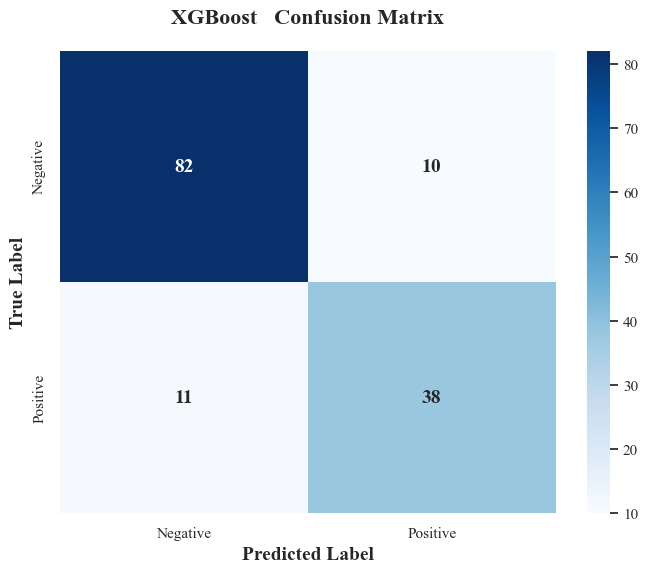

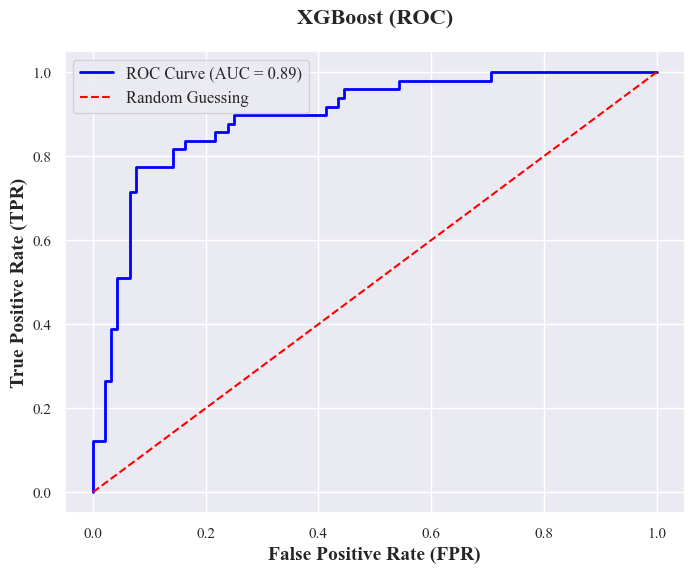

In [16]:
# Import required libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

# Set global font to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# Initialize XGBoost Classifier
np.random.seed(42)
xgb_classifier = xgb.XGBClassifier()

# Display hyperparameters
print("XGBoost Hyperparameters:")
print(xgb_classifier.get_params())
print('\n' + '='*50 + '\n')

# Train the model
xgb_classifier.fit(x_train, y_train)

# Calculate training accuracy
train_accuracy = xgb_classifier.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Make predictions
y_predictXGB = xgb_classifier.predict(x_test)
y_probs = xgb_classifier.predict_proba(x_test)[:, 1]  # Probabilities for positive class

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_predictXGB)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Classification report
print('\n' + '='*50)
print('**XGBoost Classifier Results**')
print('='*50)
print(classification_report(y_test, y_predictXGB, target_names=['Negative', 'Positive']))
print('='*50 + '\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predictXGB)
conf_df = pd.DataFrame(conf_matrix,
                      columns=['Predicted Negative', 'Predicted Positive'],
                      index=['Actual Negative', 'Actual Positive'])

print("**Confusion Matrix:**")
print(conf_df)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            annot_kws={'size': 14, 'weight': 'bold'})

plt.title('XGBoost   Confusion Matrix', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.show()

# ROC Curve Analysis
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=14, fontweight='bold')
plt.title('XGBoost (ROC)', pad=20, fontsize=16, fontweight='bold')
plt.legend(prop={'size': 12})
plt.grid(True)
plt.show()


### ---------------------------------------------
#  Autoencoder to MLP

Classification Report:
              precision    recall  f1-score   support

           0     0.8723    0.8913    0.8817        92
           1     0.7872    0.7551    0.7708        49

    accuracy                         0.8440       141
   macro avg     0.8298    0.8232    0.8263       141
weighted avg     0.8428    0.8440    0.8432       141



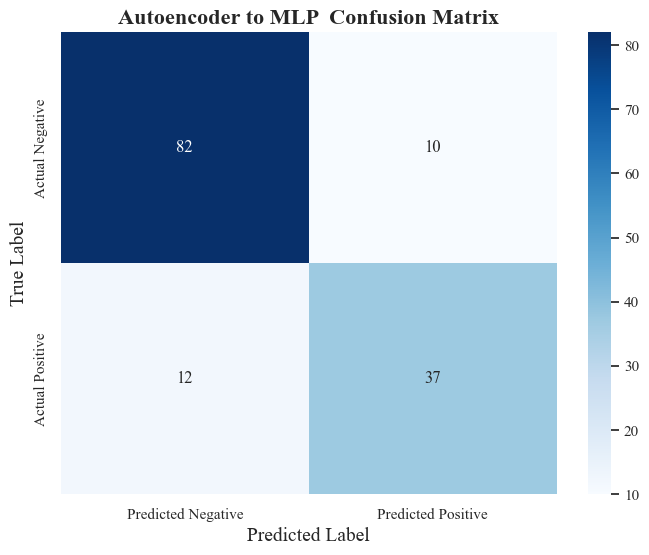

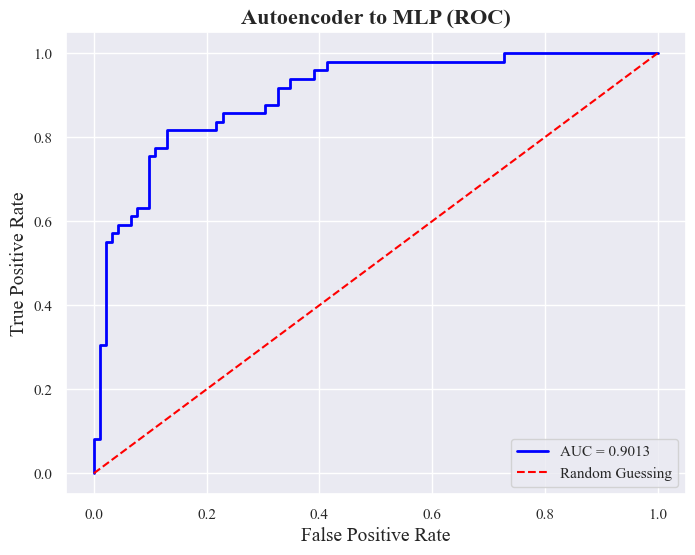

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['font.family'] = 'Times New Roman'

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

df = pd.read_csv('CGMAIN.csv')  
X = df.drop(columns='state').values
y = df['state'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=seed, stratify=y
)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoded_dim=16):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, encoded_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoded_dim, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

class MLPClassifier(nn.Module):
    def __init__(self, encoded_dim, num_classes):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(encoded_dim, 32)
        self.fc2 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

input_dim = X.shape[1]
encoded_dim = 16
num_classes = len(np.unique(y))

autoencoder = Autoencoder(input_dim=input_dim, encoded_dim=encoded_dim)
ae_optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)
ae_criterion = nn.MSELoss()

for epoch in range(20):
    autoencoder.train()
    for xb, _ in train_loader:
        ae_optimizer.zero_grad()
        reconstructed = autoencoder(xb)
        loss = ae_criterion(reconstructed, xb)
        loss.backward()
        ae_optimizer.step()

with torch.no_grad():
    encoded_train = autoencoder.encoder(X_train_tensor)
    encoded_test = autoencoder.encoder(X_test_tensor)

classifier = MLPClassifier(encoded_dim=encoded_dim, num_classes=num_classes)
clf_criterion = nn.CrossEntropyLoss()
clf_optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)

clf_train_dataset = TensorDataset(encoded_train, y_train_tensor)
clf_test_dataset = TensorDataset(encoded_test, y_test_tensor)
clf_train_loader = DataLoader(clf_train_dataset, batch_size=32, shuffle=True)
clf_test_loader = DataLoader(clf_test_dataset, batch_size=32)

for epoch in range(20):
    classifier.train()
    for xb, yb in clf_train_loader:
        clf_optimizer.zero_grad()
        out = classifier(xb)
        loss = clf_criterion(out, yb)
        loss.backward()
        clf_optimizer.step()

classifier.eval()
all_preds, all_probs, all_labels = [], [], []
with torch.no_grad():
    for xb, yb in clf_test_loader:
        out = classifier(xb)
        probs = F.softmax(out, dim=1)
        preds = torch.argmax(probs, dim=1)
        all_preds.extend(preds.numpy())
        all_probs.extend(probs[:, 1].numpy())  
        all_labels.extend(yb.numpy())

report = classification_report(all_labels, all_preds, digits=4)
print("Classification Report:")
print(report)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(all_labels, all_preds), 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Autoencoder to MLP  Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Autoencoder to MLP (ROC)', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## --------------------------------------------------------------
### CatBoost

Test Accuracy: 0.8723

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.91      0.90        92
    Positive       0.83      0.80      0.81        49

    accuracy                           0.87       141
   macro avg       0.86      0.85      0.86       141
weighted avg       0.87      0.87      0.87       141


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  84                   8
Actual Positive                  10                  39


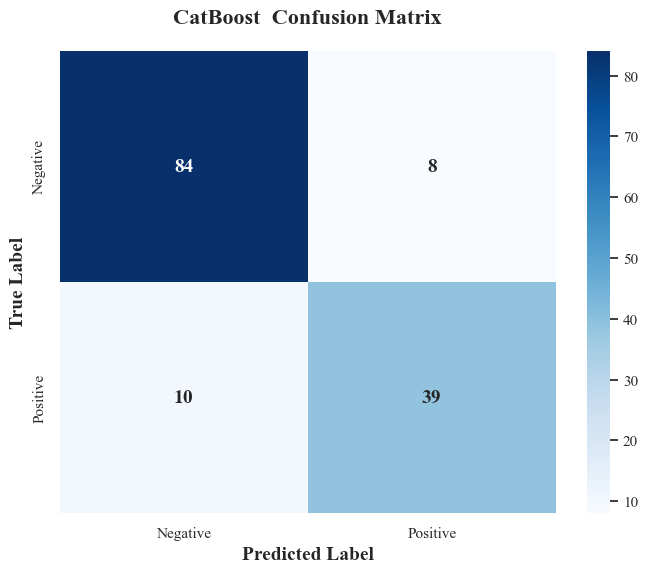

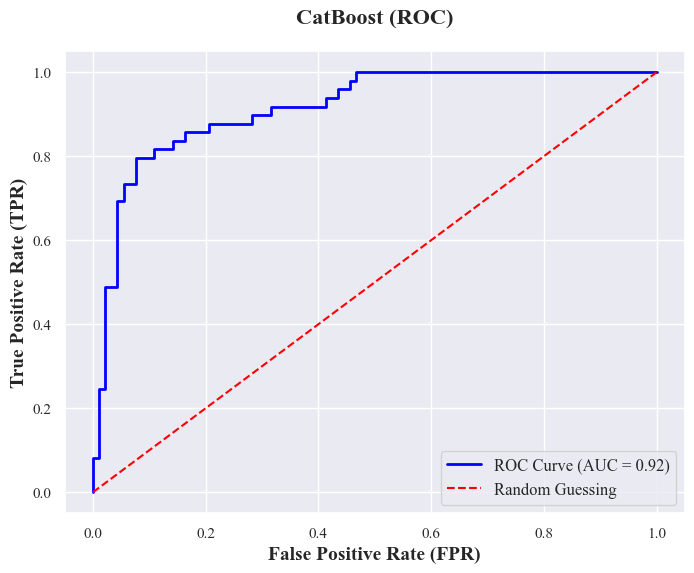

In [18]:
# Import required libraries
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

# Set global font to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# Initialize CatBoost Classifier
np.random.seed(42)
catboost_classifier = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='Accuracy',
    verbose=0,  # Disable training logs
    random_seed=42
)

# Train the model
catboost_classifier.fit(x_train, y_train)

# Make predictions
y_predictCAT = catboost_classifier.predict(x_test)
y_probs = catboost_classifier.predict_proba(x_test)[:, 1]  # Probabilities for positive class

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_predictCAT)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report
print('\nClassification Report:')
print(classification_report(y_test, y_predictCAT, target_names=['Negative', 'Positive']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predictCAT)
conf_df = pd.DataFrame(conf_matrix,
                      columns=['Predicted Negative', 'Predicted Positive'],
                      index=['Actual Negative', 'Actual Positive'])

print('\nConfusion Matrix:')
print(conf_df)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            annot_kws={'size': 14, 'weight': 'bold'})

plt.title('CatBoost  Confusion Matrix', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=14, fontweight='bold')
plt.title('CatBoost (ROC)', pad=20, fontsize=16, fontweight='bold')
plt.legend(prop={'size': 12})
plt.grid(True)
plt.show()

# _____________________________________________________________________
# _____________________________________________________________________
# WHFDL

C:\Users\Arman\AppData\Local\Temp\ipykernel_4692\1877102788.py:108: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  fuzzy_layer.sigma.data = torch.tensor(sigmas, dtype=torch.float32)


Epoch 1: Loss = 5.6014
Epoch 2: Loss = 4.9651
Epoch 3: Loss = 4.9301
Epoch 4: Loss = 4.6303
Epoch 5: Loss = 4.5438
Epoch 6: Loss = 4.5224
Epoch 7: Loss = 4.6017
Epoch 8: Loss = 4.6388
Epoch 9: Loss = 4.4759
Epoch 10: Loss = 4.7481
Epoch 11: Loss = 4.5163
Epoch 12: Loss = 4.5177
Epoch 13: Loss = 4.8960
Epoch 14: Loss = 4.5802
Epoch 15: Loss = 4.4726
Epoch 16: Loss = 4.6880
Epoch 17: Loss = 4.3891
Epoch 18: Loss = 4.4027
Epoch 19: Loss = 4.4015
Epoch 20: Loss = 4.4095
Epoch 21: Loss = 4.4675
Epoch 22: Loss = 4.3882
Epoch 23: Loss = 4.3423
Epoch 24: Loss = 4.2535
Epoch 25: Loss = 4.2260
Epoch 26: Loss = 4.4060
Epoch 27: Loss = 4.2475
Epoch 28: Loss = 4.6056
Epoch 29: Loss = 4.4883
Epoch 30: Loss = 4.5885
Epoch 31: Loss = 4.6666
Epoch 32: Loss = 4.5734
Epoch 33: Loss = 4.5649
Epoch 34: Loss = 4.7003
Epoch 35: Loss = 4.7225
Epoch 36: Loss = 4.6191
Epoch 37: Loss = 4.3953
Epoch 38: Loss = 4.4843
Epoch 39: Loss = 4.4412
Epoch 40: Loss = 4.4954
Epoch 41: Loss = 4.5455
Epoch 42: Loss = 4.5118
E

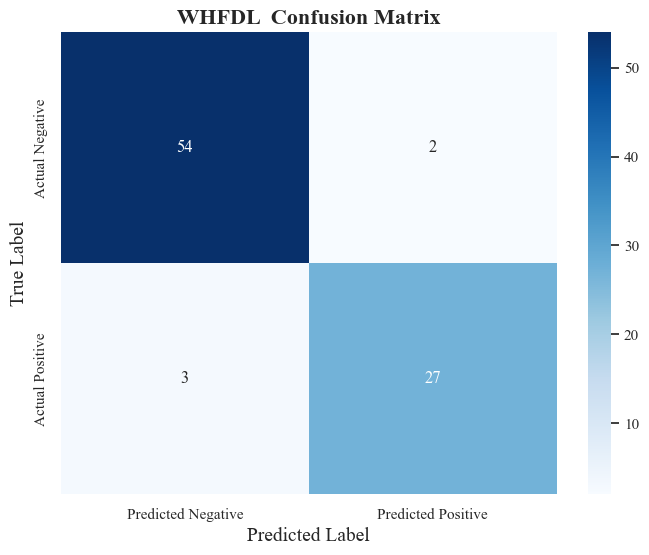

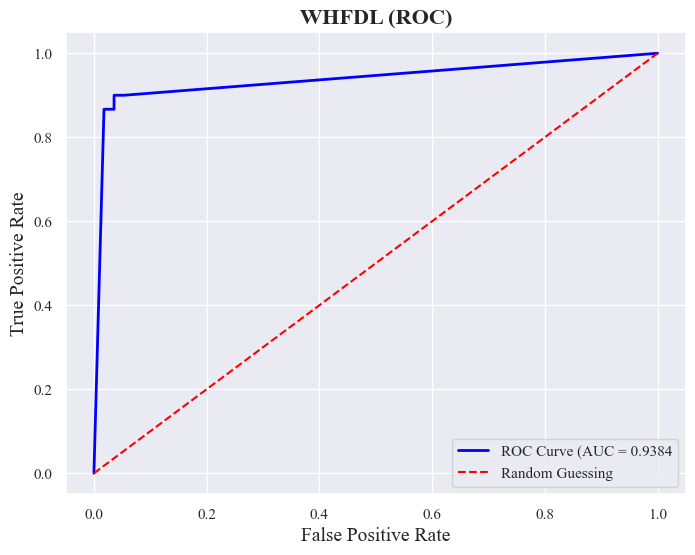

In [19]:
import torchvision
import torch
import torch.nn as nn
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from matplotlib import rcParams
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
import random  

rcParams['font.family'] = 'Times New Roman'

class FuzzyLayer(nn.Module):
    def __init__(self, in_features, num_memberships):
        super(FuzzyLayer, self).__init__()
        self.in_features = in_features
        self.num_memberships = num_memberships
        self.mu = nn.Parameter(torch.randn(num_memberships, in_features))
        self.sigma = nn.Parameter(torch.ones(num_memberships, in_features))

    def forward(self, a):
        a = a.unsqueeze(1)  
        mu = self.mu.unsqueeze(0) 
        sigma = self.sigma.unsqueeze(0) 
        fuzzy_out = torch.exp(-((a - mu) ** 2) / (sigma ** 2))
        return fuzzy_out

class NeuralRep(nn.Module):
    def __init__(self, in_features, hidden_dim=128, dropout_rate=0.1):
        super(NeuralRep, self).__init__()
        self.fc1 = nn.Linear(in_features, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.dropout = nn.Dropout(p=dropout_rate)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)           
        x = torch.relu(self.fc2(x))
        return x

class FusionLayer(nn.Module):
    def __init__(self, in_features, hidden_dim, num_memberships):
        super(FusionLayer, self).__init__()
        self.output_dim = hidden_dim
        self.fusion = nn.Linear(num_memberships * in_features + hidden_dim, hidden_dim)

    def forward(self, fuzzy_out, neural_out):
        batch_size = fuzzy_out.size(0)
        fuzzy_flat = fuzzy_out.view(batch_size, -1)
        combined = torch.cat([fuzzy_flat, neural_out], dim=1)  
        return torch.relu(self.fusion(combined))

class Classifier(nn.Module):
    def __init__(self, hidden_dim, num_classes):
        super(Classifier, self).__init__()
        self.output = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        z = self.output(x)  
        return torch.softmax(z, dim=1)

class FDNN(nn.Module):
    def __init__(self, in_features, hidden_dim, num_memberships, num_classes, dropout_rate=0.1):
        super(FDNN, self).__init__()
        self.fuzzy = FuzzyLayer(in_features, num_memberships)
        self.neural = NeuralRep(in_features, hidden_dim, dropout_rate)
        self.fusion = FusionLayer(in_features, hidden_dim, num_memberships)
        self.classifier = Classifier(hidden_dim, num_classes)

    def forward(self, x):
        fuzzy_out = self.fuzzy(x)
        neural_out = self.neural(x)
        fusion_out = self.fusion(fuzzy_out, neural_out)
        return self.classifier(fusion_out)

def initialize_fuzzy_layer(fuzzy_layer, data_loader, num_samples=1000):
    all_inputs = []
    for batch_x, _ in data_loader:
        all_inputs.append(batch_x)
    all_inputs = torch.cat(all_inputs, dim=0)

    if all_inputs.shape[0] > num_samples:
        idx = torch.randperm(all_inputs.shape[0])[:num_samples]
        all_inputs = all_inputs[idx]

    inputs_np = all_inputs.numpy()
    kmeans = KMeans(n_clusters=fuzzy_layer.num_memberships, random_state=32)
    kmeans.fit(inputs_np)

    centers = kmeans.cluster_centers_  
    fuzzy_layer.mu.data = torch.tensor(centers, dtype=torch.float32)

    labels = kmeans.labels_
    sigmas = []
    for i in range(fuzzy_layer.num_memberships):
        cluster_points = inputs_np[labels == i]
        if len(cluster_points) > 1:
            distances = ((cluster_points - centers[i]) ** 2).mean(axis=0)
            sigma = distances ** 0.5
        else:
            sigma = np.ones(fuzzy_layer.in_features) * 0.1  
        sigmas.append(sigma)
    
    fuzzy_layer.sigma.data = torch.tensor(sigmas, dtype=torch.float32)

def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)  

set_seed(42)

df = pd.read_csv('CGMAIN1.csv')
X = df.drop(columns='state').values
y = df['state'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

model = FDNN(
    in_features=X.shape[1],  
    hidden_dim=128,       
    num_memberships=3,     
    num_classes=len(np.unique(y)),        
    dropout_rate=0.1      
)

initialize_fuzzy_layer(model.fuzzy, train_loader)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
for epoch in range(100):
    total_loss = 0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss = {total_loss:.4f}")

model.eval()  
all_preds, all_probs, all_labels = [], [], []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        outputs = model(x_batch)
        probs = torch.softmax(outputs, dim=1)
        preds = torch.argmax(probs, dim=1)
        all_preds.extend(preds.numpy())
        all_probs.extend(probs[:, 1].numpy())  
        all_labels.extend(y_batch.numpy())

print(classification_report(all_labels, all_preds, target_names=['Negative', 'Positive']))

conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('WHFDL  Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('WHFDL (ROC)', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()